In [1]:
import pandas as pd
import numpy as np
import cv2
# import tifffile as tiff

# dimension
w = h = 9

data = {'class' : ['veg', 'built', 'wat']}
dt = pd.DataFrame(data)

In [2]:
#
# Reads band images and index images
#
def read_img(site, _s):
    data = []

    for i in range(1, 8):
        if _s == 'B':
            filename = "input/"+ site +"/B" + str(i) + "_250_B.tif"
        else:
            filename = "input/"+ site +"/B" + str(i) + "_250.tif"
            
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)

    index = ["NDVI.tif", "NDWI.tif", "NDBI.tif"]
    for i in index:
        filename = "input/"+ site +"/" + i
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)


#     cv2.imshow("Image", data[9])
#     cv2.waitKey(0)
    
    return data

#
# Crop and Compute
#
def crop_calc(_img, _pts):
    median = []
    std = []

    # iterate over rows with iterrows()
    for index, row in _pts.iterrows():
        # print(index, row['X'], row['Y'])
        
        # move to upper right corner
        x = row['X'] - 4
        y = row['Y'] - 4
        
        crop_img = _img[y:y+h, x:x+w]
        
        #cv2.imshow("Image", crop_img)
        #cv2.waitKey(0)
        
        median.append(np.median(crop_img))
        std.append(np.std(crop_img))
            
    return [median, std]


In [3]:
def box_plot(_stat, _img, _bndIdx): 
    
    v_res = crop_calc(_img, v_pts)
    b_res = crop_calc(_img, b_pts)
    w_res = crop_calc(_img, w_pts)
    
    
    #pd.DataFrame(v_res).to_excel(_bndIdx + "-" + _img + "-veg.xlsx")
    #pd.DataFrame(b_res).to_excel(_bndIdx + "-" + _img + "-built.xlsx")
    #pd.DataFrame(w_res).to_excel(_bndIdx + "-" + _img + "-wat.xlsx")
    
    
    # median = 0, std = 1
    folder =  "median/" if _stat == 0 else "std/"
    _v = v_res[_stat]
    _b = b_res[_stat]
    _w = w_res[_stat]

    res = [_v, _b, _w]
    res = pd.DataFrame(res)
    result = res.T
    #print(result)

    result = result.values.tolist()
    
    title = "median " if _stat == 0 else "std "
    title += str(h) + "x" + str(w) + " "
    title += "band " + _bndIdx if _bndIdx.isdigit() else _bndIdx 

    df = pd.DataFrame(result, columns=['Veg', 'Built', 'Water'])
    #df = df[~np.isnan(df)]
    boxplot = df.boxplot(column=['Veg', 'Built', 'Water'])

    #print(df)
    
    fig = boxplot.get_figure()
    fig.suptitle(title)
    
#     fig.show()
#     fig.savefig('output/' + folder + title + '.png')


In [4]:
#
# Read reference points from site a
#

v_pts = pd.read_excel('input/site-a.xlsx', sheet_name = 'Vegetation')
b_pts = pd.read_excel('input/site-a.xlsx', sheet_name = 'Built-up')
w_pts = pd.read_excel('input/site-a.xlsx', sheet_name = 'Water')

#
# Read dataset
#

i_img = read_img("Landsat8-A", 'A')

### Median Boxplot

C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


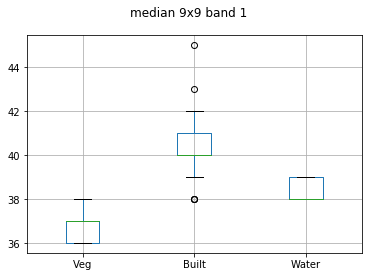

In [6]:
# median  band 1
box_plot(0, i_img[0], "1")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


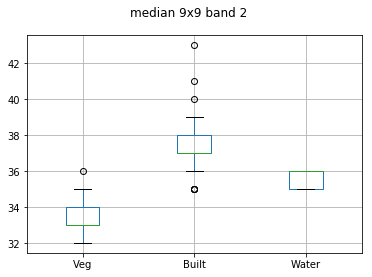

In [7]:
# median  band 2
box_plot(0, i_img[1], "2")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


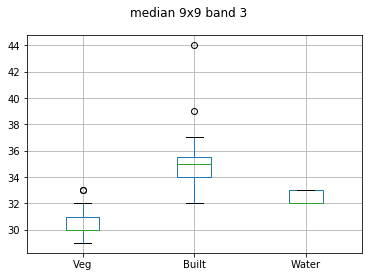

In [8]:
# median  band 3
dt2 = box_plot(0, i_img[2], "3")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


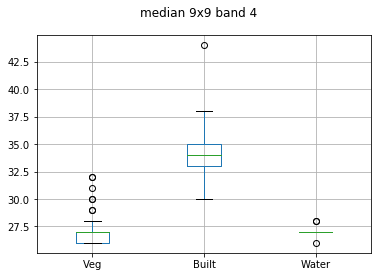

In [9]:
# median  band 4
dt2 = box_plot(0, i_img[3], "4")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


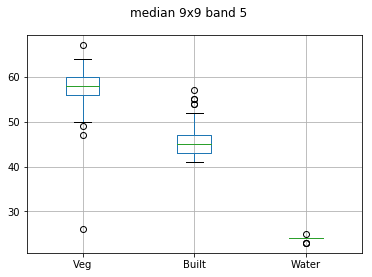

In [10]:
# median  band 5
dt2 = box_plot(0, i_img[4], "5")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


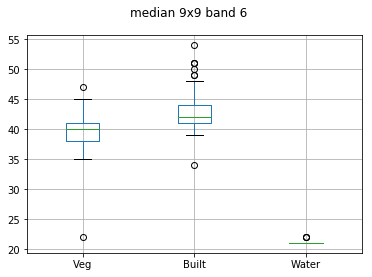

In [11]:
# median  band 6
dt2 = box_plot(0, i_img[5], "6")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


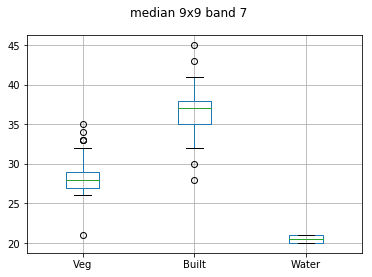

In [12]:
# median  band 7
dt2 = box_plot(0, i_img[6], "7")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


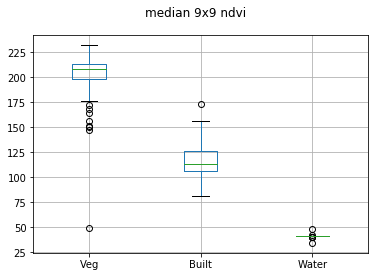

In [13]:
# median  ndvi
dt2 = box_plot(0, i_img[7], "ndvi")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


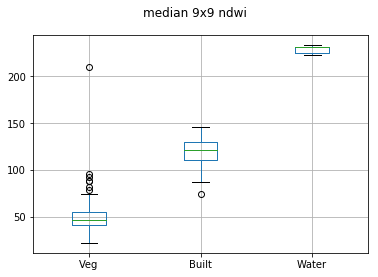

In [14]:
# median  ndwi
dt2 = box_plot(0, i_img[8], "ndwi")


C:\Users\Abe-r\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


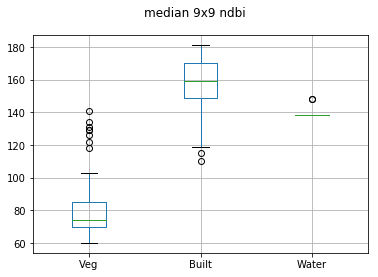

In [15]:
# median  ndbi
dt2 = box_plot(0, i_img[9], "ndbi")
